In [34]:
import numpy as np
from numpy.linalg import norm,inv,eig,eigvals
import matplotlib.pyplot as plt

A  = np.array([[2,-1,-1,0,0,0,0,0,0,0],
              [-1,2,-1,0,0,0,0,0,0,0],
              [-1,-1,3,-1,0,0,0,0,0,0],
              [0,0,-1,5,-1,0,-1,0,-1,-1],
              [0,0,0,-1,4,-1,-1,-1,0,0],
              [0,0,0,0,-1,3,-1,-1,0,0],
              [0,0,0,-1,-1,-1,5,-1,0,-1],
              [0,0,0,0,-1,-1,-1,4,0,-1],
              [0,0,0,-1,0,0,0,0,2,-1],
              [0,0,0,-1,0,0,-1,-1,-1,4]])

B  = np.array([1,-1,1,-1,1,-1,1,-1,1,-1])
x0 = np.zeros(10)


In [35]:
def JacobiIterativeMethod(A,B,x0,maxIter=1000,e =10**(-5) , W=1.0 ):
    xPlots= []
    D     = np.diag(np.diag(A))
    xK    = x0
    for k in range(maxIter):
        xPrev = xK
        xK    = xK + W * inv(D) @ (B- A@xK)
        xPlots.append(xK)
        if norm(A@xK -B)/norm(B) < e or norm(xK-xPrev)/norm(xK)< e:
            break
        
    return xPlots

xPlots = JacobiIterativeMethod(A,B,x0,100,10**(-5),1)
x      = [i for i in range(1, len(xPlots)+1)]

In [36]:
print("The solution is: {solution}".format(solution =xPlots[-1]))
print("Number of Iterations is: {iters}".format(iters = len(xPlots)))

The solution is: [ 1.24959795  0.58293128  0.91628182 -0.08366453 -0.09122435 -0.59311455
 -0.13857303 -0.54955491  0.27050972 -0.37531872]
Number of Iterations is: 71


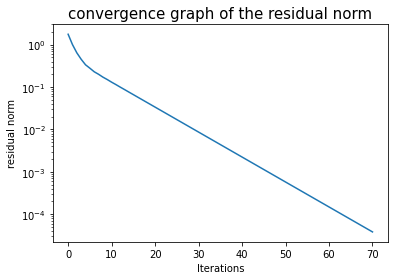

In [37]:
plt.semilogy([norm(A@x - B) for x in xPlots])
plt.title("convergence graph of the residual norm",fontsize=15)
plt.xlabel('Iterations')
plt.ylabel('residual norm')
plt.show()


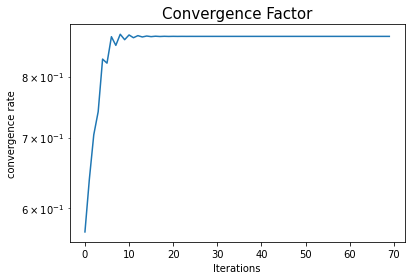

In [38]:
plt.semilogy([norm(A@x - B)/norm(A@xPrev - B) for x,xPrev in zip(xPlots[1:],xPlots[:-1])])
plt.title("Convergence Factor",fontsize=15)
plt.xlabel('Iterations')
plt.ylabel('convergence rate')
plt.show()


In [39]:
print(norm(A@xPlots[-1] - B)/norm(A@xPlots[-2] - B))

0.8732094848490717


In [40]:
def createPreconditionerM(L):
    M  = np.zeros((10,10))
    M[:3,:3] = L[:3,:3]
    M[3:,3:] =L[3:,3:]
    return M


In [41]:
def JacobiPreConditioned(A,B,M,x0,maxIter=1000,e =10**(-5) , W=0.7):
    xPlots= []
    xK    = x0
    for k in range(maxIter):
        xPrev = xK
        xK    = xK + W * inv(M) @ (B- A@xK)
        xPlots.append(xK)
        if norm(A@xK -B)/norm(B) < e or norm(xK-xPrev)/norm(xK)< e:
            break
        
    return xPlots

M      = createPreconditionerM(A)
xPlots = JacobiPreConditioned(A,B,M,x0,100,10**(-5),0.7)
x      = [i for i in range(1, len(xPlots)+1)]

The solution is: [ 0.83332477  0.16665846  0.49999161 -0.49999161 -0.50756736 -1.00946104
 -0.55491582 -0.96590045 -0.14582513 -0.79165812]
Number of Iterations is: 12


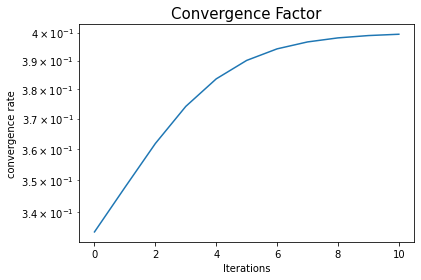

In [42]:
print("The solution is: {solution}".format(solution =xPlots[-1]))
print("Number of Iterations is: {iters}".format(iters = len(xPlots)))
plt.semilogy([norm(A@x - B)/norm(A@xPrev - B) for x,xPrev in zip(xPlots[1:],xPlots[:-1])])
plt.title("Convergence Factor",fontsize=15)
plt.xlabel('Iterations')
plt.ylabel('convergence rate')
plt.show()

In [43]:
def createMBlocks(L):
    L[[3,7]]   = L[[7,3]]
    L[:,[3,7]] = L[:,[7,3]]
    
    M  = np.zeros((10,10))

    M[:3,:3]   = L[:3,:3]
    M[3:7,3:7] = L[3:7,3:7]
    M[7:,7:]   = L[7:,7:]
    return M

M      = createMBlocks(A)
xPlots = JacobiPreConditioned(A,B,M,x0,100,10**(-5),0.7)
x      = [i for i in range(1, len(xPlots)+1)]

The solution is: [ 1.34999227  0.68332561  1.01665894 -0.44923857  0.0090909  -0.49280111
 -0.03825565  0.0166641   0.37083398 -0.27499613]
Number of Iterations is: 18


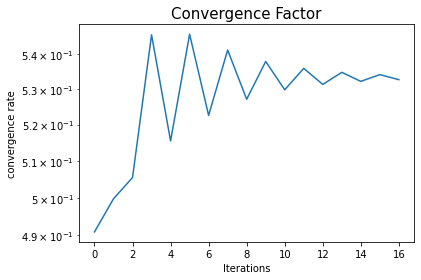

In [44]:
print("The solution is: {solution}".format(solution =xPlots[-1]))
print("Number of Iterations is: {iters}".format(iters = len(xPlots)))
plt.semilogy([norm(A@x - B)/norm(A@xPrev - B) for x,xPrev in zip(xPlots[1:],xPlots[:-1])])
plt.title("Convergence Factor",fontsize=15)
plt.xlabel('Iterations')
plt.ylabel('convergence rate')
plt.show()


The solution is: [ 1.34999227  0.68332561  1.01665894 -0.44923857  0.0090909  -0.49280111
 -0.03825565  0.0166641   0.37083398 -0.27499613]
Number of Iterations is: 18


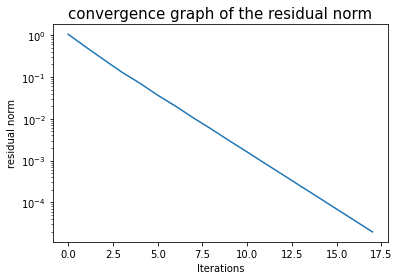

In [45]:
print("The solution is: {solution}".format(solution =xPlots[-1]))
print("Number of Iterations is: {iters}".format(iters = len(xPlots)))
plt.semilogy([norm(A@x - B) for x in xPlots])
plt.title("convergence graph of the residual norm",fontsize=15)
plt.xlabel('Iterations')
plt.ylabel('residual norm')
plt.show()